# Multi-armed Bandits
An implementation of the $k$-armed bandit problem with greedy and $\epsilon$-greedy action selection methods as described in Chapter 2 of _Reinforcement Learning: An Introduction, 2nd Edition (2018)_ by Richard S. Sutton and Andrew G. Barto. 

In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
class KArmedBandit:
    """
    Class implementing a k-armed bandit.
    
    For each of the k actions, the expected action is initialised from a
    Gaussian distribution with mean 0 and unit variance.
    
    The reward for each action is then selected from a Gaussian distribution
    with mean of the expected action and unit variance.
    
    Args:
        k (int, default=10): Number of actions (arms)
    Atributes:
        q_a (1D array of floats): List of expected action values with length k
    """
    
    def __init__(self, k=10):
        """
        Initialise expected action values
        """
        self.k = k
        self.q_a = np.random.normal(0.0, 1.0, k)
    
    def reward(self, action):
        """
        Generate reward for a particular action.
        
        Args:
            action (int): Integer action from 0 to k-1
        """
        return np.random.normal(self.q_a[action], 1.0)

In [6]:
class GreedyAgent:
    """
    Class implementing an agent using greedy or epsilon-greedy action-value methods
    
    Args:
        bandit: An instance of a KArmedBandit. This will be the bandot from which
            the agent acts on and draws rewards
        epsilon (optional float [0,1], default None): Parameter for epsilon-greedy
            action value method. If None, a greedy method will be used.
    
    Attributes:
        Qn: array of expected rewards for actions 1 to k at the nth step
        steps: number of steps performed
        accumulated_reward: total reward accumulated at current timestep
    """
    
    def __init__(self, bandit, epsilon=None):

        self.bandit = bandit
        self.k = bandit.k
        self.Qn = np.zeros(self.k)
        self.steps = 0
        self.accumulated_reward = 0.0
        self.epsilon = epsilon
        self.action_log = []
        self.expected_reward_log = self.Qn
    
    def perform_action(self):
        """
        Select an action to perform, obtain reward and update expected rewards,
        steps and accumulated reward
        """
        if self.steps == 0:
            # randomly choose an initial action
            a = np.random.randint(0, self.k)
        else:
            # choose action corresponding to largest expected reward
            a = np.argmax(self.Qn)
        if self.epsilon:
            if np.random.rand() < self.epsilon:
                # print(f'step: {self.steps}, exporatory move')
                a = np.random.randint(0, self.k)
        
        reward = self.bandit.reward(a)
        self.action_log.append(a)
        
        self.steps += 1
        self.accumulated_reward += reward
        # update expected reward
        self.Qn[a] += (reward - self.Qn[a])/self.steps
        self.expected_reward_log = np.vstack((self.expected_reward_log, self.Qn))

## A single agent
A 10-armed bandit implementation with greedy action selection and $\epsilon=0.1$ greedy action selection with 10000 steps. The action 

In [20]:
bandit = KArmedBandit()
agent = GreedyAgent(bandit)

In [21]:
for i in range(10000):
    agent.perform_action()

<IPython.core.display.Javascript object>


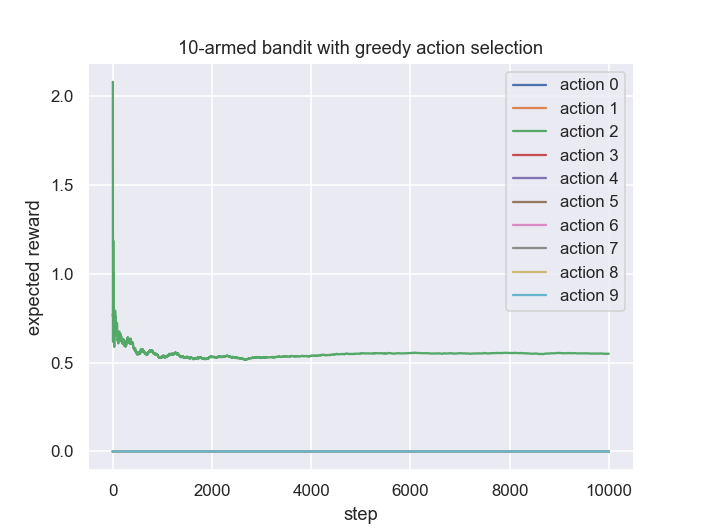

In [22]:
for idx in range(bandit.k):
    plt.plot(agent.expected_reward_log[:, idx], label=f'action {idx}')
plt.title('10-armed bandit with greedy action selection')
plt.ylabel('expected reward')
plt.xlabel('step')
plt.legend(loc='upper right')

In [23]:
agent = GreedyAgent(bandit, epsilon=0.1)

In [24]:
for i in range(10000):
    agent.perform_action()

In [25]:
for idx in range(bandit.k):
    plt.plot(agent.expected_reward_log[:, idx], label=f'action {idx}')
plt.title('10-armed bandit with epsilon=0.1 greedy action selection')
plt.ylabel('expected reward')
plt.xlabel('step')
plt.legend(loc='upper right')